# BEE 4750 Homework 3: Uncertain Sea-Level Rise and Levee Reliability

**Name**: Lesedi Kgatla

**ID**: lk535

> **Due Date**
>
> Friday, 10/06/23, 9:00pm

## Overview

### Instructions

This assignment asks you to conduct a Monte Carlo analysis of levee
reliability in the face of uncertain changes to local sea levels. You
will propagate uncertainty in equilibrium climate sensitivity through
the energy balance model to obtain a distribution of temperatures, which
will then drive a model of sea-level rise. You will finally use this
distribution to assess the probability that a planned levee will achieve
its desired reliability standard.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\lk535\Desktop\Classes\BEE 4750\Homeworks\hw03 - LesediK01\hw3-LesediK01`

    Updating registry at `C:\Users\lk535\.julia\registries\General.toml`


   Installed PDMats ─────────────────── v0.11.18


   Installed GR_jll ─────────────────── v0.72.10+0
   Installed Xorg_libSM_jll ─────────── v1.2.3+0


   Installed InlineStrings ──────────── v1.4.0


   Installed Preferences ────────────── v1.4.1
   Installed HTTP ───────────────────── v1.10.0
   Installed InvertedIndices ────────── v1.3.0


   Installed EpollShim_jll ──────────── v0.0.20230411+0


   Installed xkbcommon_jll ──────────── v1.4.1+1


   Installed SentinelArrays ─────────── v1.4.0


   Installed WeakRefStrings ─────────── v1.4.2
   Installed WorkerUtilities ────────── v1.6.1


   Installed mtdev_jll ──────────────── v1.1.6+0
   Installed StatsAPI ───────────────── v1.7.0


   Installed gperf_jll ──────────────── v3.1.1+0
   Installed DataFrames ─────────────── v1.6.1


   Installed eudev_jll ──────────────── v3.2.9+0


   Installed Xorg_xcb_util_cursor_jll ─ v0.1.4+0


   Installed libevdev_jll ───────────── v1.11.0+0


   Installed PooledArrays ───────────── v1.4.3


   Installed ColorSchemes ───────────── v3.24.0


   Installed GR ─────────────────────── v0.72.10
   Installed PrettyTables ───────────── v2.2.7
   Installed Vulkan_Loader_jll ──────── v1.3.243+0
   Installed Xorg_libICE_jll ────────── v1.0.10+1


   Installed Crayons ────────────────── v4.1.1


   Installed Wayland_jll ────────────── v1.21.0+1
   Installed OpenSSL_jll ────────────── v1.1.23+0


   Installed Qt6Base_jll ────────────── v6.5.2+2
   Installed Tables ─────────────────── v1.11.0


   Installed Glib_jll ───────────────── v2.76.5+0


   Installed FilePathsBase ──────────── v0.9.20


   Installed FillArrays ─────────────── v1.6.1
   Installed StringManipulation ─────── v0.3.4
   Installed QuadGK ─────────────────── v2.9.1


   Installed CSV ────────────────────── v0.10.11


   Installed libinput_jll ───────────── v1.18.0+0


Precompiling project...


  ✓ StatsAPI
  ✓ WorkerUtilities
  ✓ 

InvertedIndices


  ✓ FillArrays


  ✓ PDMats


  ✓ Preferences


  ✓ Xorg_libICE_jll


  ✓ PooledArrays


  ✓ Tables


  ✓ SentinelArrays


  ✓ FilePathsBase


  ✓ Crayons


  ✓ FillArrays → FillArraysSparseArraysExt


  ✓ QuadGK


  ✓ JLLWrappers


  ✓ PrecompileTools


  ✓ FillArrays → FillArraysStatisticsExt


  ✓ Xorg_libSM_jll
  ✓ StatsBase


  ✓ OpenSSL_jll


  ✓ Libmount_jll


  ✓ EpollShim_jll
  ✓ Graphite2_jll


  ✓ LLVMOpenMP_jll


  ✓ Bzip2_jll
  ✓ Rmath_jll


  ✓ Xorg_libXau_jll


  ✓ libpng_jll


  ✓ libfdk_aac_jll


  ✓ LAME_jll


  ✓ LERC_jll


  ✓ fzf_jll


  ✓ JpegTurbo_jll


  ✓ XZ_jll


  ✓ mtdev_jll
  ✓ Ogg_jll


  ✓ gperf_jll


  ✓ Xorg_libXdmcp_jll


  ✓ x265_jll


  ✓ x264_jll
  ✓ libaom_jll


  ✓ Zstd_jll
  ✓ Expat_jll


  ✓ LZO_jll


  ✓ Opus_jll


  ✓ Xorg_xtrans_jll


  ✓ libevdev_jll


  ✓ Libiconv_jll


  ✓ Libffi_jll


  ✓ Libgpg_error_jll
  ✓ Wayland_protocols_jll


  ✓ OpenSpecFun_jll


  ✓ Xorg_libpthread_stubs_jll


  ✓ FriBidi_jll
  ✓ Libuuid_jll


  ✓ Pixman_jll


  ✓ FreeType2_jll


  ✓ Rmath

  ✓ RecipesBase


  ✓ StringManipulation


  ✓ OpenSSL


  ✓ JLFzf


  ✓ libvorbis_jll


  ✓ eudev_jll


  ✓ Libtiff_jll


  ✓ XML2_jll


  ✓ Libgcrypt_jll


  ✓ Fontconfig_jll


  ✓ libinput_jll


  ✓ Gettext_jll


  ✓ Wayland_jll


  ✓ XSLT_jll


  ✓ Glib_jll


  ✓ SpecialFunctions


  ✓ Xorg_libxcb_jll


  ✓ HTTP


  ✓ ColorVectorSpace → SpecialFunctionsExt


  ✓ DualNumbers


  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libX11_jll


  ✓ Xorg_xcb_util_image_jll


  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_xcb_util_keysyms_jll


  ✓ HypergeometricFunctions


  ✓ Xorg_xcb_util_wm_jll
  ✓ Xorg_libXext_jll


  ✓ Xorg_libXrender_jll


  ✓ Xorg_libXfixes_jll


  ✓ Xorg_xcb_util_cursor_jll


  ✓ Xorg_libxkbfile_jll


  ✓ Libglvnd_jll


  ✓ Xorg_libXinerama_jll


  ✓ StatsFuns


  ✓ Cairo_jll


  ✓ Xorg_libXrandr_jll


  ✓ Xorg_libXcursor_jll


  ✓ Xorg_libXi_jll
  ✓ Xorg_xkbcomp_jll


  ✓ ColorSchemes


  ✓ HarfBuzz_jll


  ✓ GLFW_jll
  ✓ Xorg_xkeyboard_config_jll


  ✓ xkbcommon_jll


  ✓ libass_jll


  ✓ Vulkan_Loader_jll

  ✓ FFMPEG_jll


  ✓ PrettyTables


  ✓ Distributions


  ✓ 

FFMPEG
  ✓ Qt6Base_jll


  ✓ GR_jll


  ✓ Parsers


  ✓ InlineStrings


  ✓ PlotUtils


  ✓ JSON


  ✓ WeakRefStrings


  ✓ PlotThemes


  ✓ GR


  ✓ RecipesPipeline


  ✓ CSV


  ✓ DataFrames


  ✓ Latexify → DataFramesExt


  ✓ Plots


  ✓ Plots → UnitfulExt
  124 dependencies successfully precompiled in 197 seconds. 56 already precompiled.


In [1]:
using Random
using Plots
using LaTeXStrings
using Distributions
using CSV
using DataFrames

## Problems (Total: 40 Points)

### Problem 1 (12 points)

Recall from class that the simple energy balance model (EBM) of
planetary energy balance links changes in radiative forcing ($F$) to
global mean temperature ($T$) changes through the discretized equation
$$T_{i+1} = T_{i} + \frac{F_i - \lambda T_i}{cd} \times \Delta t,$$
where $i$ is the current time step, $c = 4.184 \times 10^6$
J/K/m<sup>2</sup> is the heat capacity of water per unit area, $d$ is
the (uncertain) depth of the mixing layer, $\Delta t$ is the annual time
step in seconds and $\lambda = F_{\text{2xCO}_2}/S$ is the climate
feedback parameter in W/m<sup>2</sup>/$^\circ$ C, where $S$ is the
equilibrium climate sensitivity (the uncertain equilibrium temperature
change resulting from a doubling of atmospheric CO<sub>2</sub>).
Finally, while total radiative forcing can be the result of non-aerosol
and aerosol effects, we do not know the relative intensity of aerosol
forcing, so we represent this with an uncertain aerosol scaling factor
$\alpha$.

We can implement this model with the following Julia function. We will
assume an ocean mixing depth $d = 100$ m and an aerosol scaling factor
$\alpha = 1.3$ so we can focus on the uncertainty in $S$.

The last technical concern is that “global mean temperature” does not
make sense in absolute terms as a marker of climate change. Instead, we
typically refer to temperature changes relative to some historical
pre-industrial baseline. In this case, we will use the period from
1880-1900, though this choice can vary.

In [2]:
# we need to split up the aerosol and non-aerosol forcings when we call the function
function energy_balance_model(S, forcing_aerosol, forcing_non_aerosol)
    d = 100 # ocean mixing depth [m]
    α = 1.3 # aerosol scaling factor
    F2xCO₂ = 4.0 # radiative forcing [W/m²] for a doubling of CO₂
    λ = F2xCO₂/S
    
    c = 4.184e6 # heat capacity/area [J/K/m²]
    C = c*d # heat capacity of mixed layer (per area)

    F = forcing_non_aerosol + α*forcing_aerosol # radiative forcing

    Δt = 31558152.0 # annual timestep [s]
    
    T = zero(F)
    for i in 1:length(F)-1
        T[i+1] = T[i] + (F[i] - λ*T[i])/C * Δt
    end
    # return temperature anomaly relative to 1880-1900 baseline
    return T .- mean(T[1:21]) 
end

energy_balance_model (generic function with 1 method)

Finally, we need to load some radiative forcing data. We will use the
radiative forcing scenario RCP 8.5. We can load this data, which is in a
`.csv` (comma-delimited) file, into a `DataFrame`, which is a tabular
data structure. Rows and columns in a `DataFrame` can be accessed using
their numerical index (like a matrix), but columns also have names; you
can access a particular column in a dataframe `df` by name using
`df.colname` or `df[:, "colname"]`.

Of note: this data set goes from 1750–2500, so you will need to take
care to make sure you are using the right years at each step. For
example, here we will constrain the data to 1880–2100, which is the
period we are interested in.

In [3]:
# The CSV is read into a DataFrame object, and we specify that it is comma delimited
forcings_all_85 = CSV.read("data/ERF_ssp585_1750-2500.csv", DataFrame, delim=",")

# get the years corresponding to the forcings
t = Int64.(forcings_all_85[!,"year"]) # Ensure that years are interpreted as integers
# find the indices of the years 1880 and 2100
# we can do this with the indexin function
time_bounds = indexin([1880, 2100], t)
years = time_bounds[1]:time_bounds[2] # create range of years

# Separate out the individual components
forcing_co2_85 = forcings_all_85[years,"co2"]
# Get total aerosol and non-aerosol forcings
forcing_aerosol_rad_85 = forcings_all_85[years,"aerosol-radiation_interactions"]
forcing_aerosol_cloud_85 = forcings_all_85[years,"aerosol-cloud_interactions"]
forcing_aerosol_85 = forcing_aerosol_rad_85 + forcing_aerosol_cloud_85 # aerosol forcings
forcing_total_85 = forcings_all_85[years,"total"] 
forcing_non_aerosol_85 = forcing_total_85 - forcing_aerosol_85 # non-aerosol forcings

221-element Vector{Float64}:
  0.42741479112315905
  0.4487940147601447
  0.4900144276528058
 -0.019811270078689047
 -1.480725700367619
 -0.3154905163510021
  0.233186559774844
  0.2923308952663089
  0.45833872365810924
  0.5168189581089915
  ⋮
  9.879065698371564
  9.946850640754889
 10.002169546141578
 10.061009359425011
 10.115684195707905
 10.182946497594184
 10.249699157847772
 10.331407709334023
 10.424544495740134

For this assignment, you can use the `forcing_aerosol_85` and
`forcing_non_aerosol_85` vectors as is to correspond to the relevant
forcings. You will need to use the vector `t` to find the appropriate
years for analysis.

#### Problem 1.1 (3 points)

Assume that $S$ is distributed according to
$\text{LogNormal}(\log(3.2), \log{2}/3)$ (as in class). Draw 10,000
samples from this distribution and make a histogram.

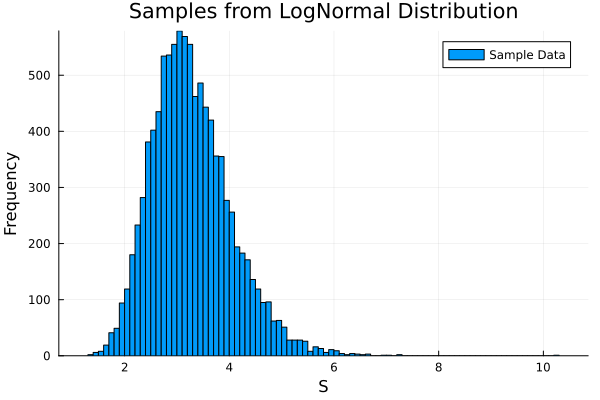

In [59]:
#Define parameters 
μ = log(3.2)
σ = log(2)/3

dist = LogNormal(μ, σ) #create LogNormal distribution
samples = rand(dist, 10000) #draw samples from the distribution

#plot sample histogram
h = histogram(samples, bins = 100, label = "Sample Data", xlabel = "S (degrees C)", ylabel = "Frequency", 
title = "Samples from LogNormal Distribution") 
display(h)



#### Problem 1.2 (5 points)

Use the EBM to propagate your samples of $S$ to a distribution of global
mean temperature. Plot the median and 90% predictive distribution
(between the .05 and .95 quantiles) from 1880-2100.

In [37]:
#define function to calculate median
function custom_median(vec)
    sorted_vec = sort(vec) #sort array so that median value can be identified
    n = length(sorted_vec)
    #return median value with condition that if the array is even-sized, the average of the middle values must be returned  
    if n % 2 == 0 
        return (sorted_vec[n/2] + sorted_vec[n/2 +1])/2
    else
        return sorted_vec[div(n+1, 2)]
    end
end

#define function to calculate quantile
function custom_quantile(vec, q)
    sorted_vec = sort(vec) #sort array 
    n = length(sorted_vec)
    index = Int(floor(q*n))
    #select value at the desired quantile using interpolation 
    if index == 0 #calculate position of quantile
        return sorted_vec[1]
    elseif index >= n
        return sorted_vec[end]
    else
        return sorted_vec[index] + (q * n - index) * (sorted_vec[index + 1] - sorted_vec[index])
    end
end
    
#Draw samples from previous problem
μ = log(3.2)
σ = log(2)/3
dist = LogNormal(μ, σ) 
samples = rand(dist, 10000)

years = t[131:351] #vector for the years 1880 - 2100
temps = zeros((length(samples), length(years))) #empty vectors to store temp values
#run EBM for each sample to return a matrix where the column represents temp_anomalies for the sample
temp_anomalies = [energy_balance_model(S, forcing_aerosol_85, forcing_non_aerosol_85) for S in samples]

#transpose the matrix using a splat operator so that each row corresponds to a simulation and the columns correspond to a year
temp_anomalies_t = hcat(temp_anomalies...)

#Compute median and 90% predictive distribution
n = size(temp_anomalies_t, 2) #compute median 
#iterate through each temp_anomalies
for i = 1:n 
    median_temp = custom_median(temp_anomalies_t[:, i])
end 
#iterate through each temp_anomalies row, calling the quantile function
for i = 1:n 
    q05_temp = custom_quantile(temp_anomalies_t[:, i], 0.05)
end 

for i = 1:n 
    q95_temp = custom_quantile(temp_anomalies_t[:, i], 0.95)
end 


In [38]:
plot(t[years], median_temp, ribbon = (median_temp .- q05_temp, q95_temp .- median_temp), fillalpha = 0.3,
xlabel = "Year", ylabel = "Temperature Anomaly (degrees C)", label = "90% PI", title = "Global Mean Temperature (1880 -2100)")
plot!(t[years], median_temp, lw = 2, label = "Median") #overlaying median temperature

BoundsError: BoundsError: attempt to access 751-element Vector{Int64} at index [[1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100]]

#### Problem 1.3 (4 points)

Make a histogram of global mean temperature projections in 2100. If you
compare this distribution to the distribution of $S$ from Problem 1.1,
what do you observe?

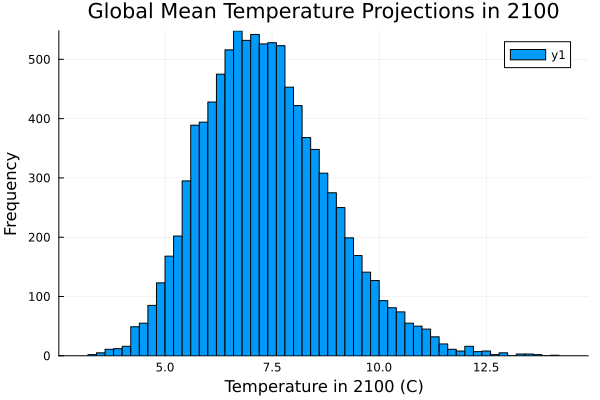

In [7]:
#Draw samples from problem 1.1
μ = log(3.2)
σ = log(2)/3
dist = LogNormal(μ, σ) 
samples = rand(dist, 10000)

temp_projections_2100 = Float64[] 
#run EBM for each sample 
for S in samples
    temp_projections = energy_balance_model(S, forcing_aerosol_85, forcing_non_aerosol_85)
    push!(temp_projections_2100, temp_projections[end])
end

#Plot histogram
histogram(temp_projections_2100, bins = 50, xlabel = "Temperature (degrees C)", ylabel = "Frequency", 
title = "Global Mean Temperature Projections in 2100")

The distributions shown in the plots are observed to be different - in Problem 1.1 the distribution is for equilibrium sensitivity, S; whereas, in Problem 1.3 the distribution is for the global mean temperature. Variability is noticeable in the spreads of the two histograms. In the plot for S, the spread along the x-axis ranges from ~ 1 to 7, whereas in the plot for global mean temperature the spread is across a wider range. Since the global mean temperature is a function of S, when running the EBM, for S, uncertainties are propagated. This is the reasoning hypothesised to be the cause of this.   

### Problem 2 (15 points)

Changes to global temperatures cause changes in global sea levels
through several mechanisms, including thermal expansion (the change in
ocean volume due to increased heat content) and melting land-based ice.
One simple way to represent this link is through the following model,
proposed by [Rahmstorf (2007)](https://doi.org/10.1126/science.1135456).

$$\frac{dH}{dt} = a(T-T_0),$$

where $H$ is the global mean sea level in mm, $T$ is global mean
temperature, $T_0$ is an equilibrium temperature (where there is no
change in sea levels), and $a$ is a proportionality constant. This model
can be discretized to give $$H_{i+1} - H_i = a (T_i - T_0).$$

Note that, like with global mean temperature, the notion of “global mean
sea level” does not make sense in absolute terms (were sea levels ever
at “zero”?). Instead, we want to normalize this relative to some
historical baseline. In this case (with a view towards Problem 3), we
will compute our sea levels relative to the 2010 sea level. Note that in
addition to the model parameters, we also need an initial sea-level
parameter $H_0$ which will give us the right anomaly level.

The best estimates for these parameters are:

-   $a = 1.86$;
-   $H_0 = -223$;
-   $T_0 = -0.62$

#### Problem 2.1 (5 points)

Write a function `sea_level_model()` to implement the mathematical
sea-level rise model described above. It should take in needed
parameters and a vector of temperatures and return a vector of sea
levels. To test your function, use the provided temperature series
`historical_temps` (read in below) to compute the global mean sea level
anomaly in 2022 (the last year of the dataset) with the parameter values
above; you should get a value of approximately 40mm.

In [8]:
historical_temp_data = CSV.read("data/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.csv", DataFrame, delim=",")
# column 2 is the temperature anomaly, column 1 is the year
temp_bds = indexin([1880, 1900], historical_temp_data[!, 1]) # find the index of 2010 for normalization
historical_temp_data[:, 2] .-= mean(historical_temp_data[temp_bds[1]:temp_bds[2], 2])
historical_temps = historical_temp_data[temp_bds[1]:end, 2]

143-element Vector{Float64}:
  0.07297116761904765
  0.15655772761904765
  0.09327316761904769
  0.04232884761904765
 -0.10351681238095234
 -0.08232033238095232
 -0.03210037238095231
 -0.10998251238095236
  0.00942435761904764
  0.13890768761904768
  ⋮
  1.0616748976190478
  1.2139176176190476
  1.3217303776190477
  1.2339774976190476
  1.1514572476190477
  1.2798758476190477
  1.3115970476190477
  1.1506591476190478
  1.1896871476190476

In [46]:
function sea_level_model(a::Float64, T0::Float64, H0::Float64, temp::Vector{Float64})
    #set parameter values
    a = 1.86
    T0 = -0.62
    H0 = -223

    H = zeros(length(temp)) #initialize array 
    H[1] = H0 #set initial sea level
    #compute sea level for each temperature using the discretized equation
    for i in 2:length(temp) #compute corresponding sea level using discretized equation, starting from the second element
        H[i] = H[i - 1] + a * (temp[i - 1] - T0)
    end

    baseline_year = 2010
    start_year = 2018
    index = baseline - start_year + 1 #calculate index for the baseline using 2010 as the baseline year and 2018 as the start year
    
    #Normalize temperature anomaly relative to the baseline
    if index > 0 && index <= length(H)
        normalization = H[index]
        return H .- normalization #normalize temperature
    end
end


sea_level_model (generic function with 2 methods)

In [45]:
#Plot global mean sea level anomaly for 2022
println("sea level anomaly in 2022: ", round(sea_level_model(historical_temps)[end]; digits = 2), "mm" )

MethodError: MethodError: no method matching sea_level_model(::Vector{Float64})

Closest candidates are:
  sea_level_model(::Any, !Matched::Any, !Matched::Any, !Matched::Any)
   @ Main c:\Users\lk535\Desktop\Classes\BEE 4750\Homeworks\hw03 - LesediK01\hw3-LesediK01\hw03.ipynb:1
  sea_level_model(!Matched::Float64, !Matched::Float64, !Matched::Float64, !Matched::Vector{Float64})
   @ Main c:\Users\lk535\Desktop\Classes\BEE 4750\Homeworks\hw03 - LesediK01\hw3-LesediK01\hw03.ipynb:1


#### Problem 2.2 (5 points)

Evaluate `sea_level_model()` using the projected temperature ensemble
from Problem 1. Plot the 90% projection interval of the sea levels.

Initially I had made the assumption that since the we were not using the Statistics package, we had to manually compute functions to calculate the median and quantiles. However, I later realised, that i could use quantile. However, I did not change it in the questions as I was apprehensive of potentially introducing errors. 

In [49]:
temp_samples = [energy_balance_model(S, forcing_aerosol_85, forcing_non_aerosol_85) for S in samples]  #From Problem 1.2

#initialize matrix to store sea level projections
years, samples = size(temp_samples)
sea_level_projections = zeros(years, samples)
#Run sea_level_model for each item
for i in 1: samples
    sea_samples[:, i] = sea_level_model(a, T0, H0, temp_samples[:, i]) 
end

ss_matrix = hcat(sea_samples...)  #compute 2D matrix using splat operator 

#function to calculate median from Problem 1.2
function custom_median(vec)
    sorted_vec = sort(vec) #sort array so that median value can be identified
    n = length(sorted_vec)
    #return median value with condition that if the array is even-sized, the average of the middle values must be returned  
    if n % 2 == 0 
        return (sorted_vec[n/2] + sorted_vec[n/2 +1])/2
    else
        return sorted_vec[div(n+1, 2)]
    end
end

#function to calculate quantile from Problem 1.2
function custom_quantile(vec, q)
    sorted_vec = sort(vec) #sort array 
    n = length(sorted_vec)
    index = Int(floor(q*n))
    #select value at the desired quantile using interpolation 
    if index == 0 #calculate position of quantile
        return sorted_vec[1]
    elseif index >= n
        return sorted_vec[end]
    else
        return sorted_vec[index] + (q * n - index) * (sorted_vec[index + 1] - sorted_vec[index])
    end
end

# Compute 5th, 95th percentile, and median for each year
q05_sea_levels = [custom_quantile([ss_matrix[:, i] for j in 1:temp_samples], 0.05) for i in 1:length(t[years])]
q95_sea_levels = [custom_quantile([ss_matrix[:, i] for j in 1:temp_samples], 0.95) for i in 1:length(t[years])]
median_sea_levels = [custom_median([ss_matrix[:, i] for j in 1:temp_samples]) for i in 1:length(t[years])]


BoundsError: BoundsError: attempt to access Tuple{Int64} at index [2]

In [12]:
# Plot the median sea levels with ribbons representing the 90% confidence interval
plot(t[years], median_sea_levels, ribbon=(median_sea_levels .- q05_sea_levels, q95_sea_levels .- median_sea_levels), 
fillalpha=0.3, lw=2, label="Median with 90% CI", xlabel="Year", ylabel="Sea Level (mm)", title="Projected Sea Levels 1880-2100")

BoundsError: BoundsError: attempt to access 751-element Vector{Int64} at index [[1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100]]

#### Problem 2.3 (5 points)

Make a histogram of the sea-level anomaly in 2100. What can you observe
about how the ECS uncertainty has impacted sea-level uncertainty under
this radiative forcing scenario? What might the implications be of only
using the best-estimate ECS value?

In [50]:
#Extract sea level projections for 2100
#Applying the assumption that the last column corresponds to 2100
sea_levels_2100 = sea_samples[:, end]

#Plot histogram
histogram(sea_levels_2100, bins = 30, xlabel = "Sea Level Anomaly in 2100(mm)", ylabel = "Frequency", title = "Sea Level Anomaly in 2100")

UndefVarError: UndefVarError: `sea_samples` not defined

Without seeing the plot, the reasoning for the implications of only using the best-estimate ECS value will be based on the material discussed in class. When using one ECS value, uncertainty is not propagated into the results. This results in only a trend being determinable. This limits other quantifiable data related to uncertainties that can be determined.

### Problem 3 (13 points)

You’ve been asked to consult on a levee reliability analysis. For
context, levees in the United States are supposed to only fail once in
100 years, or, in other words, to have at most a 1% chance of failure in
a given year. We will assume for this problem that the only way in which
a levee fails is by being overtopped (note: this is unrealistic).

We can assess the probability of levee overtopping by comparing its
height to a distribution of extreme sea levels. A common approach is to
look at the distribution of the highest sea level each year. These
extreme sea levels can be obtained by combining the absolute sea level
(we will use our distribution of global sea levels for this), the rate
of subsidence (how much the ground sinks), and the distribution of storm
tides (the highest tide level, which is often the result of storm surges
combining with high tide).

Assume for this problem that:

1.  the annual rate of subsidence $\nu$ is 1.2mm/yr;
2.  the distribution of annual storm tide maxima, above the mean sea
    level, is (and is expected to continue to be) given by a
    $\text{GeneralizedExtremeValue}(900, 25, 0.3)$ distribution, which
    looks like this:

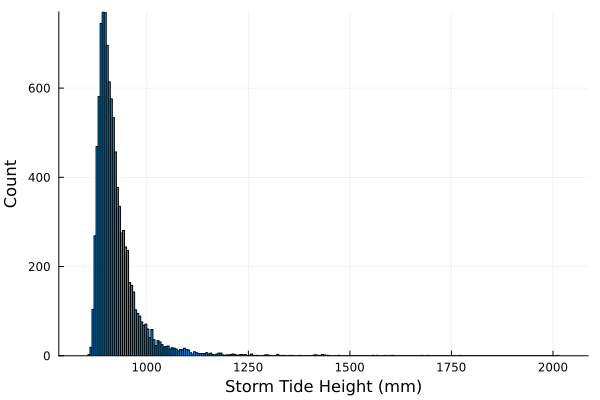

In [14]:
tide_distribution = GeneralizedExtremeValue(900, 25, 0.3)
    histogram(rand(tide_distribution, 10000), xlabel="Storm Tide Height (mm)", ylabel="Count", legend=:false)

Feel free to just sample from `tide_distribution` in your solution
below.

#### Problem 3.1 (2 points)

How would you use your sea-level simulations and the above information
to compute a distribution of extreme sea levels in 2100 relative to 2010
mean sea level? Write down the approach in clear steps, with equations
as needed.

Step-wise Approach 
1. Similar to Problem 1.1, I will start off by simulating Absolute Sea Levels in 2100 based on the distribution of global sea levels. 
2. Subsidence from 2010 to 2100 has to be accounted for. Ssince the rate of subsidence (v) was given as 1.2 mm/yr, it can be used to calculate the total subsidence from 2010 to 2100. This will be done so using the following equation:

                Total Subsisdence from 2010 to 2100 = v * (2100 - 2010) = 1.2 * 90 = 108

Subsequently, the simulated sea levels can be adjusted by adding the total subsidence value incrementally to each year's simulation: $$\ S_t' = S_t + (v × (t - 2010)).$$

3. I can then draw samples from the provided GeneralizedExtremeValue(900, 25, 0.3) distribution to simulate the annual storm tide maxima for each year until 2100. 

4. The adjusted absolute sea levels and storm tide samples can be combined to calculate the extreme sea levels for each year. This will be done for each simulated sample using the following equation:

                $$\ E_t = S_t' + T_t,$$

    where E_t is extreme sea levels and T_t is the storm tide height at year t.
	
5. Lastly, I can extract the calculated extreme sea levels for the year 2100 from the simulations to form a distribution, which will be the desired distribution of extreme sea levels in 2100 relative to the 2010 mean sea level.


#### Problem 3.2 (3 points)

Follow the steps above and produce a histogram of the extreme sea levels
in 2100 relative to 2010.

In [19]:
#Set seed for reproducibility
Random.seed!(1)

#Initialize Parameters
subsidence_rate = 1.2  # mm/yr
n_years = 2100 - 2010 + 1  # From year 2010 to 2100
n_samples = 10000  # Number of samples for simulation

# 1. Simulating Absolute Sea Levels in 2100
S_t = rand(tide_distribution, n_samples, n_years) #draw samples from the distribution

# 2. Accounting for Subsidence
for t in 1:n_years
    S_t[:, t] .+= subsidence_rate * (t - 1)
end

# 3. Generating Storm Tide Samples
tide_distribution = GeneralizedExtremeValue(900, 25, 0.3) #From the code provided above
T_t = rand(tide_distribution, n_samples, n_years)

# 4. Calculating Extreme Sea Levels
E_t = S_t + T_t

# 5. Generating Distribution for 2100
extreme_sea_levels_2100 = E_t[:, end]

10000-element Vector{Float64}:
 1914.6202570887076
 1904.2814104660363
 1965.1496443894239
 1900.398969082139
 1991.8186667437576
 1941.356946587738
 1913.4728892199985
 1951.2605894756662
 1917.829938825878
 1935.7255844012534
    ⋮
 1911.489279435109
 1945.190035859017
 1905.373259329593
 1926.7631957311114
 1999.5841803819158
 1945.0069792603804
 1916.989706698807
 1922.3121709211757
 1945.926087355478

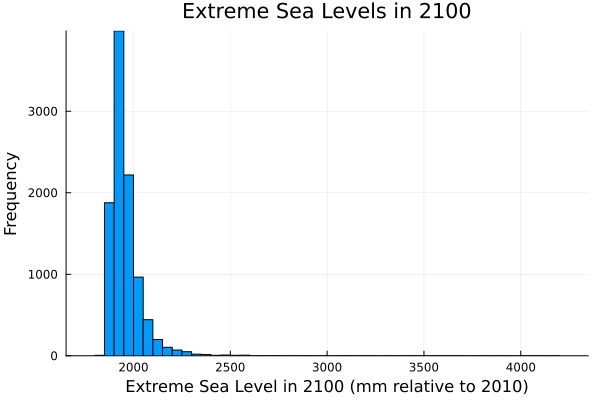

In [20]:
histogram(extreme_sea_levels_2100, bins = 50, xlabel = "Extreme Sea Level in 2100 (mm relative to 2010)", 
ylabel = "Frequency", legend=:false, title = "Extreme Sea Levels in 2100") #Plot of the distribution

#### Problem 3.3 (5 points)

The current levee was heightened in 2010 to 2m above the 2010 mean sea
level. Based on your analysis above, what is the probability that the
levee will be overtopped in 2100 (remember that the reliability standard
is 1%)?

In [23]:
#Initialize variable to set the height of the levee in mm
levee_height_2010 = 2000 #mm

n_overtopping = count(extreme_sea_levels_2100 .> levee_height_2010) #Calculate the number of overtopping events

probability_overtopping = n_overtopping / n_samples #Compute the probability of overtopping in 2100

#Output the probability
println("The probability of overtopping in 2100 is: ", probability_overtopping * 100, "%")


The probability of overtopping in 2100 is: 19.13%


#### Problem 3.4 (3 points)

Based on your analysis, would you recommend that the levee be heightened
again in the future, and if so, how high? What other information might
you need, if any, to make your recommendation?

To determine whether the levee should be heightened, and by how much, depends on various factors, such as (but not limited to) regulatory safety standards, future projections of sea level, economic considerations, and the potential consequences of levee failure. However, to help answer the question empirically, upon which the recommendation will be based, the the sea level that is exceeded with a 1% probability will be determined. An arbituary safety margin will be set and applied to threshold to determine the recommendation

In [29]:
#Since the sea level that is exceeded with 1% probability in 2100 is the 99th percentile of the extreme_sea_levels_2100 distribution
threshold_level = quantile(extreme_sea_levels_2100, 0.99)

#Set arbitrary safety margin variable to help determine how high the levee should be heightened 
safety_margin = 500  # mm
#Calculate the suggested new levee height with safety margin
suggested_levee_height = threshold_level + safety_margin
#Check if the suggested height is greater than the current levee height
if suggested_levee_height > levee_height_2010
    println("Since the threshold level is ", round(threshold_level, digits = 2), " mm, it is recommended that the levee be heightened to ", round(suggested_levee_height, digits = 2), " mm.")
end


Since the threshold level is 2282.28 mm, it is recommended that the levee be heightened to 2782.28 mm.


## References

List any external references consulted, including classmates.

Consulted with Akshara and Christine

Besançon, M., Papamarkou, T., Anthof, D.,  Arslan, A., Byrne, S., Lin, D., and Pearson, J. 2021. Distributions.jl: Definition and Modeling of
Probability Distributions in the JuliaStats Ecosystem. Journal of Statistical Software vol 98(16) https://doi.org/10.18637/jss.v098.i16 

GeeksforGeeks. 2020. Concatenation of arrays in Julia – cat(), vcat(), hcat() and hvcat() Methods (online) https://www.geeksforgeeks.org/concatenation-of-arrays-in-julia-cat-vcat-hcat-and-hvcat-methods/ (Accessed 06 October 2023)

GeeksforGeeks. 2022. Logical and Cartesian Indexing in Julia (online) https://www.geeksforgeeks.org/logical-and-cartesian-indexing-in-julia/ (Accessed 04 October 2023)

GeeksforGeeks. 2020. Manipulating matrices in Julia (online) https://www.geeksforgeeks.org/manipulating-matrices-in-julia/ (Accessed 06 October 2023)

Julia. n.d. (online) https://docs.julialang.org/en/v1/base/base/#:~:text=The%20%22splat%22%20operator%2C%20.,(xs...)%20%3D (Accessed 06 October 2023)

Julia Distributions. n.d. (online) https://juliastats.org/Distributions.jl/stable/univariate/ (Accessed 03 October 2023)

Julia Plots. n.d. Histograms (online) https://docs.juliaplots.org/latest/series_types/histogram/ (Accessed 03 October 2023)

Kabir. n.d. DataFrames in Julia (online) https://www.machinelearningplus.com/julia/dataframes-in-julia/ (Accessed 05 October 2023)

Kabir. n.d. For-Loop in Julia (online) https://www.machinelearningplus.com/julia/for-loop-in-julia/ (Accessed 05 October 2023)

StackOverflow. 2015. End of array in variable in julia (online) https://stackoverflow.com/questions/34086675/end-of-array-in-variable-in-julia (Accessed 05 October 2023)

StackOverflow. 2014. Explanation of splat (online) https://stackoverflow.com/questions/26983019/explanation-of-splat (Accessed 06 October 2023 )